In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

w[0]: 0.393906  b: -0.031804


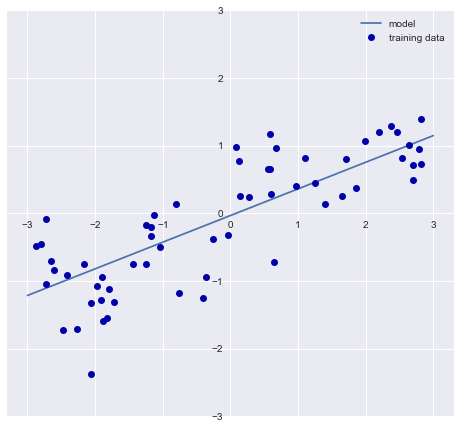

In [2]:
mglearn.plots.plot_linear_regression_wave()

# 선형 회귀(최소제곱법)

- OLS(ordinary least squares)를 이용한 고전적인 선형회귀 기법
- MSE(Mean Square Error)를 최소화하는 파라미터 w와 b를 찾는다
- MSE는 오차의 제곱합


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples =60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [4]:
print('lr.coef : {}'.format(lr.coef_))
print('lr.intercept : {}'.format(lr.intercept_))
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

lr.coef : [ 0.39390555]
lr.intercept : -0.03180434302675973
훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [5]:
from sklearn.datasets import load_boston

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

In [6]:
print('lr.coef : {}'.format(lr.coef_))
print('lr.intercept : {}'.format(lr.intercept_))
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

lr.coef : [ -4.75050668e+02   7.66248976e+00  -9.55383040e+01   1.33708435e+01
   3.77399151e+01   6.14571931e+01   3.45207050e+01  -1.20844469e+00
   2.89411288e+00   7.97381567e+01   1.39184091e+01   3.75868123e+01
  -2.73954567e+00   1.60075207e+01   6.71246566e+02   1.42025664e+03
   2.32122643e+02  -8.92062028e+01   6.87533012e+01  -4.98496442e+00
   5.87818767e+01   7.52035243e+02  -1.81075008e+03   5.21676580e+02
  -1.80410932e+01   1.00731434e+02  -4.26622200e+00  -1.21271166e+01
  -3.70329436e+00  -5.58361945e+01  -7.08769204e-02   8.51265643e+00
  -2.05278198e+01  -3.58234147e+01   4.25566751e+01  -3.35963152e+00
   1.13184946e+01  -3.25999376e+01   3.72859479e+01  -2.14650482e+00
   7.37428237e+00   4.88105086e+01   6.75839169e+00   4.21110920e+01
  -7.85387669e+00  -1.98976150e+00  -3.41928334e+00   3.34194555e+01
  -1.60278024e+01   1.33708435e+01  -1.80036506e+01  -2.86117967e+01
  -2.85803880e+00  -1.04759665e+01   1.25916205e+00  -1.47486907e+00
  -7.72662500e+00   5.87

# Ridge Regression
- 최소적합법에사용하는 같은 예측 함수를 사용하지만, 릿지 회귀에서의 가중치 선택은 훈련 데이터를 잘 예측하기 위해서 추가 제약 조건을 건다
- 모든원소가 0에 가깝게 되는것을 선호한다. 
- 모든 특성이 출력에 주는 영향을 최소한으로 만드는데 이를 규제(Regularization) 이라고 한다. 
- 릿지회귀에서는 L2규제를 사용한다. 기존 MSE 식에 alpha * L2 Norm을 더한다. 
- alpha는 설정가능한데 낮을수록 패널티의 효과가 작아지다가 0이되면 일반적인 선형회귀가 된다.
- 훈련세트에서의 점수는 일반 회귀보다 낮지만 테스트 세트에서의 점수는 올라가서 과대적합이 적어졌다고 할수 있다. 

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
#print('ridge.coef : {}'.format(ridge.coef_))
#print('ridge.intercept : {}'.format(ridge.intercept_))
print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.81


In [8]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
#print('ridge10.coef : {}'.format(ridge10.coef_))
#print('ridge10.intercept : {}'.format(ridge10.intercept_))
print('훈련 세트 점수 : {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.77
테스트 세트 점수 : 0.73


In [9]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
#print('ridge01.coef : {}'.format(ridge01.coef_))
#print('ridge01.intercept : {}'.format(ridge01.intercept_))
print('훈련 세트 점수 : {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


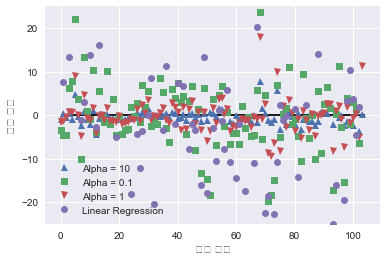

In [10]:
plt.plot(ridge10.coef_, '^', label = "Alpha = 10")
plt.plot(ridge01.coef_, 's', label = "Alpha = 0.1")
plt.plot(ridge.coef_, 'v', label = "Alpha = 1")

plt.plot(lr.coef_, 'o', label = 'Linear Regression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

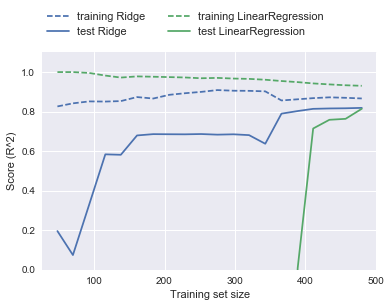

In [11]:
mglearn.plots.plot_ridge_n_samples()

# Lasso 모델
- Ridge회귀와 마찬가지로 계수를 0에 가깝게 만든다.
- Ridge와 달리 L1규제를 사용하여 MSE값에 alpha * L1 norm을 더해준다.
- Lasso 회귀는 계수를 정말 0으로 만들어버린다. 
- 특성선택이 자동으로 이루진다고 볼 수 있다. 

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso.coef_ != 0)))

# 과소적합

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.26
사용한 특성의 수 : 3


In [13]:
# 'max_iter' 기본값을 증가시키지 않으면 max_iter을 늘리라는 경고 발생 
lasso001 = Lasso(alpha=0.01, max_iter= 100000).fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso001.coef_ != 0)))


훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.80
사용한 특성의 수 : 34


- alpha값을 너무 낮추면 규제의 효과가 없어져 과대적합 발생

In [14]:
# 'max_iter' 기본값을 증가시키지 않으면 max_iter을 늘리라는 경고 발생 
lasso00001 = Lasso(alpha=0.0001, max_iter= 100000).fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso00001.coef_ != 0)))


훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.81
사용한 특성의 수 : 94


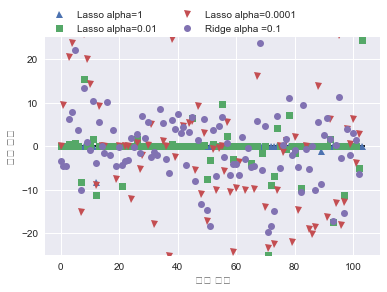

In [15]:
plt.plot(lasso.coef_, '^', label = 'Lasso alpha=1')
plt.plot(lasso001.coef_, 's', label = 'Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label = 'Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha =0.1')
plt.hlines(0, 0,len(ridge.coef_))
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.ylim(-25, 25)
plt.legend(ncol = 2, loc =(0, 1))

- 특성이 많고 그중 일부분만 중요하다고 판단되면 Lasso가 좋은 선택이다. 


# ElasticNet
- Ridge회귀와 Lasso 회귀를 합친 회귀분석
- MSE값에다가 L1과 L2규제를 모두 더하여 계산한다. 
- 매개변수는 alpha와 L1 ratio가 있는데 규제식은 다음과 같다
- alpha * l1_ratio * L1_Norm + 1/2 * alpha * (1 - l1_ratio) * L2_Norm

In [16]:
from sklearn.linear_model import ElasticNet

ENet = ElasticNet().fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ENet.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ENet.score(X_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(ENet.coef_ != 0)))

# 과소적합


훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.30
사용한 특성의 수 : 34


In [17]:
ENet = ElasticNet(alpha = 0.01, l1_ratio=0.7).fit(X_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ENet.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ENet.score(X_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(ENet.coef_ != 0)))

# 과소적합

훈련 세트 점수 : 0.85
테스트 세트 점수 : 0.80
사용한 특성의 수 : 70
